In [1]:
import h5py
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = 'out_veremi'

In [29]:
V = pd.read_feather('out_veremi/test-mixall.feather')

In [38]:
V['delta_time'].max()

171.0

In [51]:
V[(V.sender == 124899) & (V.bsm_rcv_time > 100)]

,dataset_id,message_id,bsm_rcv_time,receiver,sender,attack_type,snd_pos_x,snd_pos_y,snd_spd_x,snd_spd_y,...,rcv_pos_x,rcv_pos_y,rcv_spd_x,rcv_spd_y,rcv_acl_x,rcv_acl_y,rcv_hed_x,rcv_hed_y,delta_time,seq_len
3285333,0.0,385852864.0,70614.578125,124971.0,124899.0,0.0,622.664856,349.405731,10.591725,3.619794,...,1014.896179,475.989258,-11.595036,-4.170302,-0.504738,-0.181465,-0.960219,-0.279247,167.0,2021
3285339,0.0,385870496.0,70615.578125,124875.0,124899.0,0.0,633.428345,353.023315,10.528963,3.598826,...,1021.180237,477.771057,-11.767840,-4.100206,0.093100,0.032458,-0.949199,-0.314677,160.0,2021
3285363,0.0,385907200.0,70618.578125,124953.0,124899.0,0.0,664.833618,363.782410,10.539500,3.604832,...,1053.083008,489.540924,-11.862871,-4.535195,-0.542164,-0.206994,-0.973420,-0.229025,160.0,2021
3285376,0.0,385931488.0,70620.578125,124803.0,124899.0,0.0,685.663696,371.063538,10.572788,3.691284,...,1068.590820,497.487396,-9.566414,-7.190610,0.040861,0.030878,-0.811376,-0.584524,171.0,2021
3285439,0.0,386029152.0,70628.578125,124881.0,124899.0,0.0,769.728699,400.387543,10.537741,3.678823,...,1084.429321,513.602173,3.100644,-11.130006,-1.206995,4.335574,0.169778,-0.985482,168.0,2021


In [3]:
f = h5py.File('out_veremi/veremi-mixall-10.h5')

In [4]:
test = f['test']
labels = f['test_labels']

In [28]:
labels[934455]

array([  0,   0, 269], dtype=uint32)

[   3    0 4863]


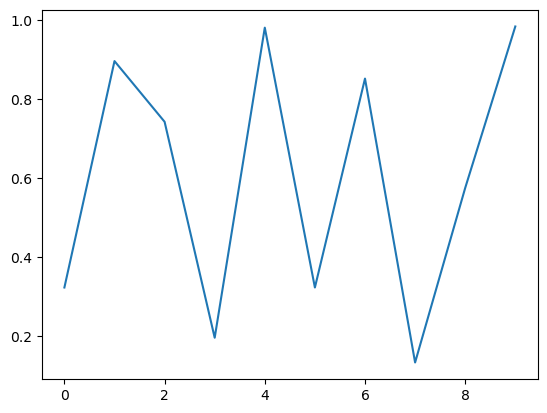

In [9]:
seq = 0
print(labels[-610])
plt.plot(test[:, -610, 0])

In [ ]:
np.random.seed(seed=42)
print(f['train_full_genuine'].shape[1])
seqs = np.random.randint(f['train_full_genuine'].shape[1], size=(10,))
seqs.sort()

print(seqs)
f['train_full_genuine'][:, seqs, 16]

In [ ]:
all_seqs = np.concatenate((f['train_full_genuine'], f['test']), axis=1)
min_a = np.min(all_seqs, axis=(0, 1))
max_a = np.max(all_seqs, axis=(0, 1))
del all_seqs
min_a, max_a

In [ ]:
train = f['train_full_genuine'][:]
test = f['test'][:]

train = normalize3(train, min_a, max_a)
test = normalize3(test, min_a, max_a)

labels = f['test_labels'][:]

np.save(os.path.join(folder, 'train.npy'), train)
np.save(os.path.join(folder, 'test.npy'), test)
np.save(os.path.join(folder, 'labels.npy'), labels)

In [ ]:
labels = f['test_labels'][:]

In [ ]:
labels[356]